<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

In [6]:
norm_rv = stats.norm(loc=30, scale=5) # loc = mean, scale - standard deviation
samples = np.trunc(norm_rv.rvs(365))
samples[:30]

array([32., 29., 33., 37., 28., 28., 37., 33., 27., 32., 27., 27., 31.,
       20., 21., 27., 24., 31., 25., 22., 37., 28., 30., 22., 27., 30.,
       24., 31., 26., 28.])

In [7]:
samples.mean(), samples.std()

(29.52054794520548, 4.77410133275075)

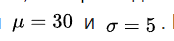

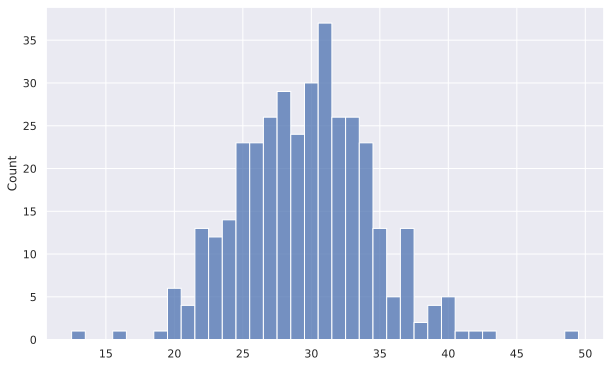

In [8]:
sns.histplot(x=samples, discrete=True);

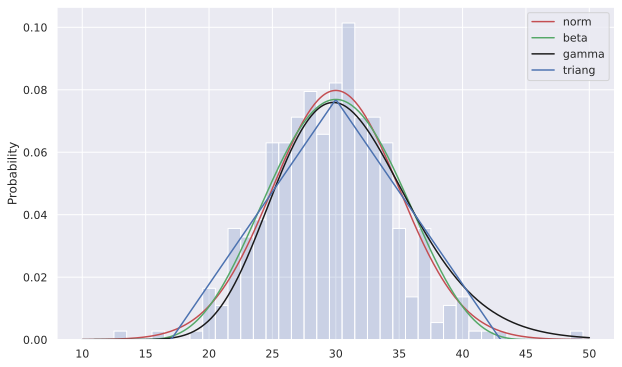

In [10]:
norm_rv = stats.norm(loc=30, scale=5)
beta_rv = stats.beta(a=5, b=5, loc=14, scale=32) # a=5, b=5 — параметры формы (чем они больше, тем распределение становится более симметричным). loc=14 — смещение (минимальное значение). scale=32 — диапазон значений ( max-min), от 14 до 14+32=46. Часто используется для моделирования вероятностей и долей (например, процентное соотношение успеха в тестах).
gamma_rv = stats.gamma(a = 20, loc = 7, scale=1.2) # a=20 — параметр формы (чем он больше, тем ближе распределение к нормальному). loc=7 — смещение (минимальное значение). scale=1.2 — коэффициент масштабирования. От 7 до бесконечности (так как гамма-распределение определено на [0; +inf].  Используется в анализе времени до наступления событий (например, время жизни компонентов в технике).
tri_rv = stats.triang(c=0.5, loc=17, scale=26) #c=0.5 — мода (относительное положение максимума внутри диапазона). loc=17 — минимальное значение. scale=26 — диапазон ( max − min max−min), значит, максимум будет в 17 + 26 = 43. От 17 до 43 с максимумом посередине (30). Используется в моделировании экспертных оценок и неопределённостей (например, оценка времени выполнения проекта).

x = np.linspace(10, 50, 300)

sns.lineplot(x = x, y = norm_rv.pdf(x), color='r', label='norm')
sns.lineplot(x = x, y = beta_rv.pdf(x), color='g', label='beta')
sns.lineplot(x = x, y = gamma_rv.pdf(x), color='k', label='gamma')
sns.lineplot(x = x, y = tri_rv.pdf(x), color='b', label='triang')

sns.histplot(x=samples, discrete=True, stat='probability',
             alpha=0.2);

In [15]:
unif_rv = stats.uniform(loc=0, scale=4) # [loc, loc+scale]
unif_rv.rvs()

0.17263964780230445

In [16]:
unif_rv.rvs(size=3) # Время доставки за 3 дня

array([3.56457245, 2.11080444, 3.97185918])

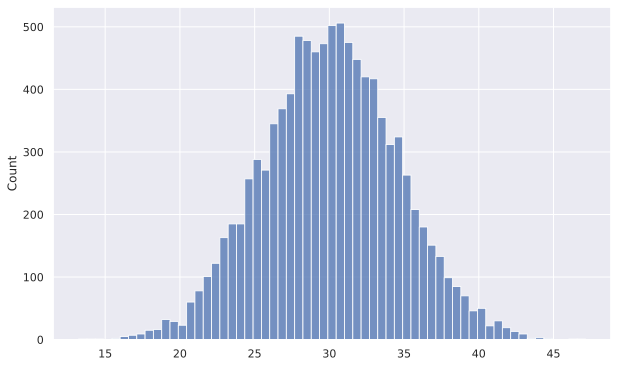

In [18]:
Y_samples = [unif_rv.rvs(size=15).sum() for i in range(10000)] # Общее время доставки
# смысл центральной предельной теоремы: распределение суммы случайных переменных стремится к нормальному распределению при увеличении количества слагаемых в этой сумме.
sns.histplot(x=Y_samples);

In [23]:
N = 5000
t_data = norm_rv.rvs(N)
t_data[(25 < t_data) & (t_data < 35)].size/N

0.6862

In [24]:
t_data[t_data > 40].size/N

0.0198

## 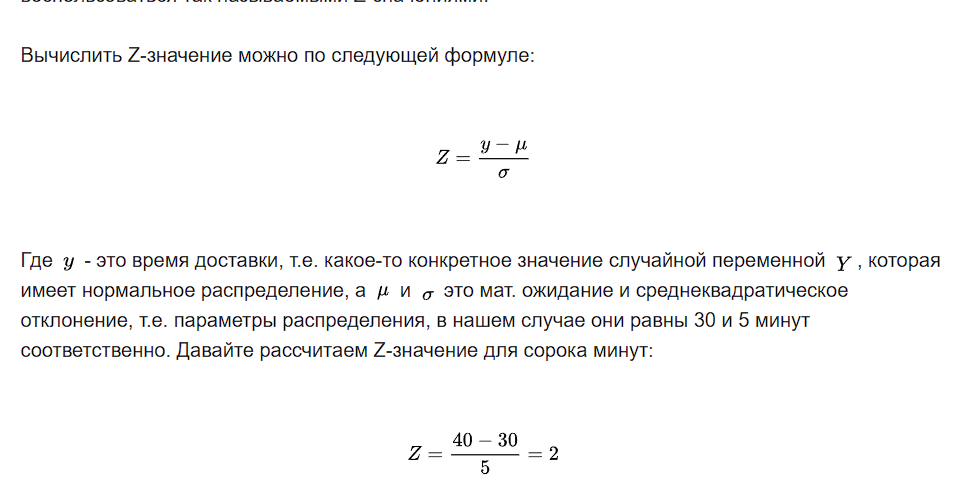

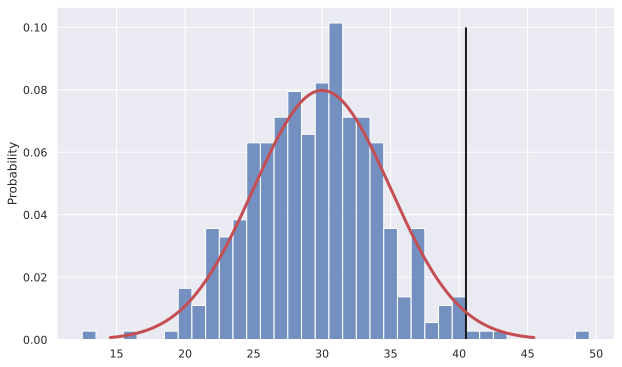

In [25]:
fig, ax = plt.subplots()
x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 200)
ax.vlines(40.5, 0, 0.1, color='k', lw=2)
sns.lineplot(x=x, y=norm_rv.pdf(x), color='r', lw=3)
sns.histplot(x=samples, stat='probability', discrete=True);

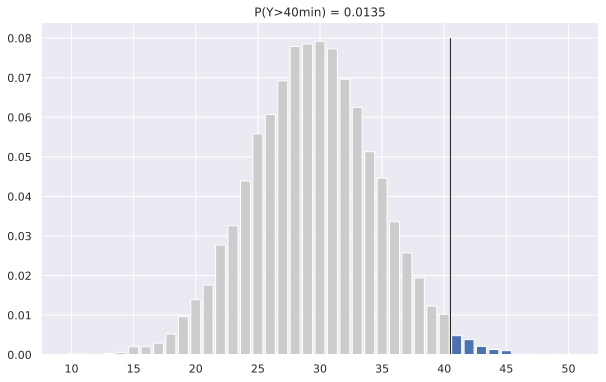

In [26]:
np.random.seed(42)
N = 10000
values = np.trunc(norm_rv.rvs(N))

fig, ax = plt.subplots()
v_le_41 = np.histogram(values, np.arange(9.5, 41.5))
v_ge_40 = np.histogram(values, np.arange(40.5, 51.5))
ax.bar(np.arange(10, 41), v_le_41[0]/N, color='0.8')
ax.bar(np.arange(41, 51), v_ge_40[0]/N)
p = np.sum(v_ge_40[0]/N)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.vlines(40.5, 0, 0.08, color='k', lw=1);

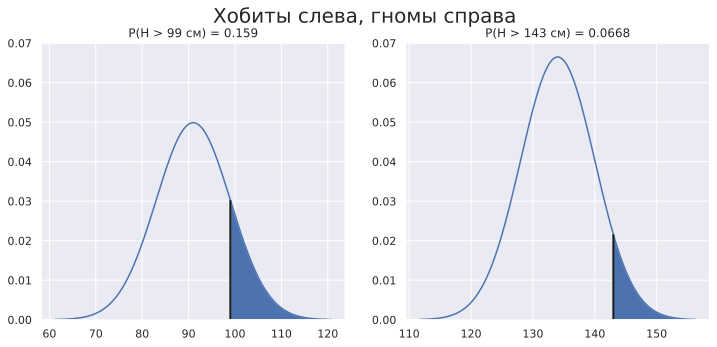

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))

nrv_hobbit = stats.norm(91, 8)
nrv_gnome = stats.norm(134, 6)

for i, (func, h) in enumerate(zip((nrv_hobbit, nrv_gnome), (99, 143))):
    x = np.linspace(func.ppf(0.0001), func.ppf(0.9999), 300)
    ax[i].plot(x, func.pdf(x))
    ax[i].fill_between(x[x>h], func.pdf(x[x>h]), np.zeros(len(x[x>h])))
    p = 1 - func.cdf(h)
    ax[i].set_title('P(H > {} см) = {:.3}'.format(h, p))
    ax[i].hlines(0, func.ppf(0.0001), func.ppf(0.9999), lw=1, color='k')
    ax[i].vlines(h, 0, func.pdf(h), color='k', lw=2)
    ax[i].set_ylim(0, 0.07)
fig.suptitle('Хобиты слева, гномы справа', fontsize = 20);

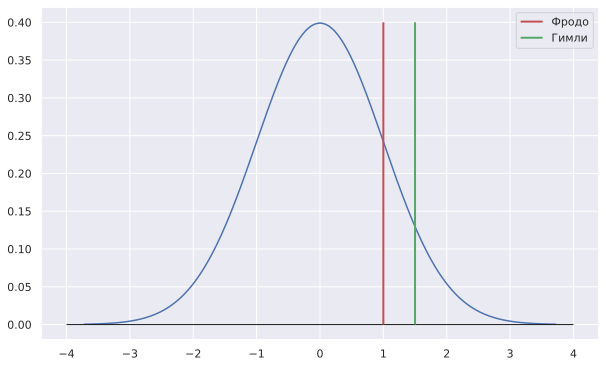

In [28]:
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(1, 0, 0.4, color='r', lw=2, label='Фродо')
ax.vlines(1.5, 0, 0.4, color='g', lw=2, label='Гимли')
ax.legend();

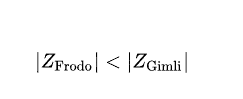

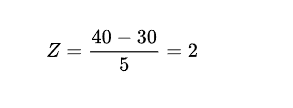

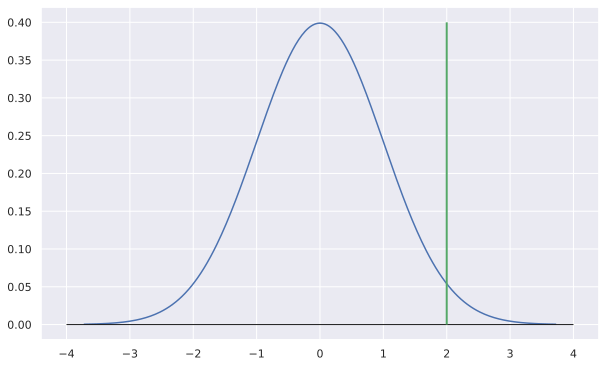

In [29]:
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(2, 0, 0.4, color='g', lw=2);

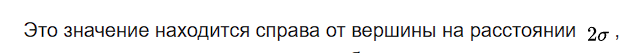

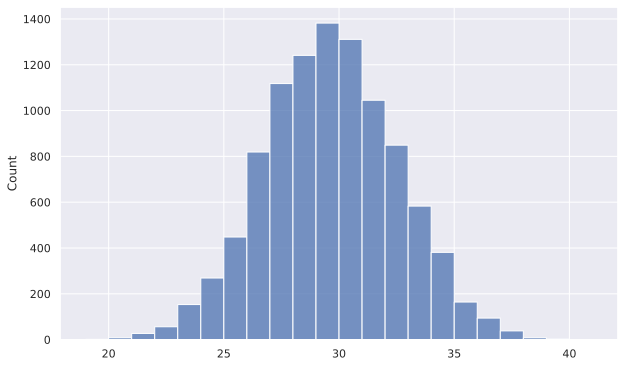

In [30]:
sns.histplot(np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1),
             bins=np.arange(19, 42));

In [32]:
1-N_rv.cdf(2)

0.02275013194817921

In [33]:
(1 - N_rv.cdf(2))**3

1.1774751750476762e-05

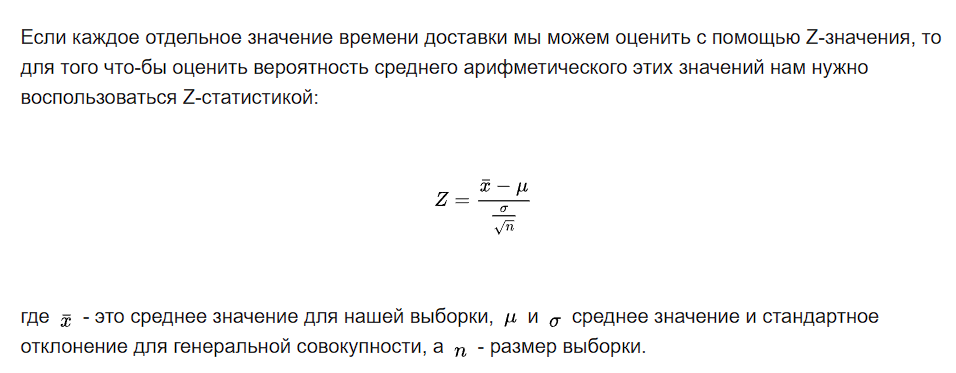

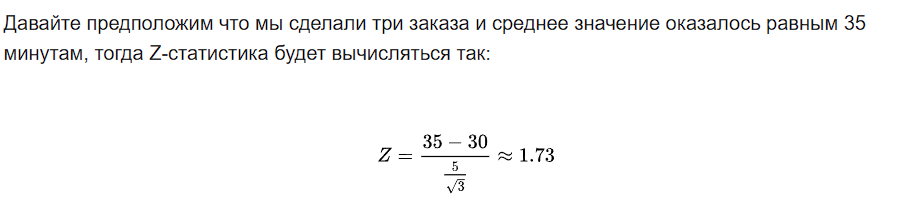

In [35]:
N = 10000
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
means[(means>=25)&(means<=35)].size/N

0.9253

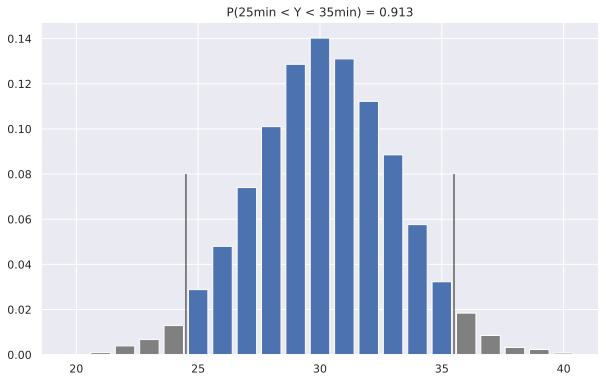

In [36]:
N = 10000
fig, ax = plt.subplots()
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
h = np.histogram(means, np.arange(19, 41))
ax.bar(np.arange(20, 25), h[0][0:5]/N, color='0.5')
ax.bar(np.arange(25, 36), h[0][5:16]/N)
ax.bar(np.arange(36, 41), h[0][16:22]/N, color='0.5')
p = np.sum(h[0][6:16]/N)
ax.set_title('P(25min < Y < 35min) = {:.3}'.format(p))
ax.vlines([24.5 ,35.5], 0, 0.08, color='k', lw=1);

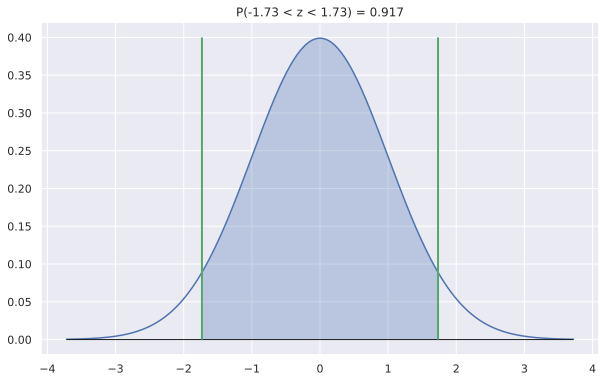

In [37]:
x, n, mu, sigma = 35, 3, 30, 5
z = abs((x - mu)/(sigma/n**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

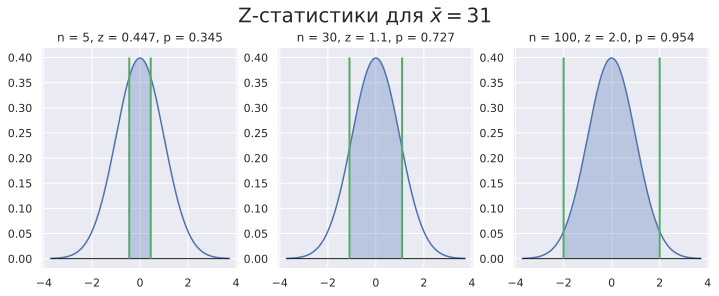

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))

for i, n in enumerate([5, 30, 100]):
    x, mu, sigma = 31, 30, 5
    z = abs((x - mu)/(sigma/n**0.5))

    N_rv = stats.norm()
    x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
    ax[i].plot(x, N_rv.pdf(x))
    ax[i].hlines(0, x.min(), x.max(), lw=1, color='k')
    ax[i].vlines([-z, z], 0, 0.4, color='g', lw=2)
    x_z = x[(x>-z) & (x<z)] # & (x<z)
    ax[i].fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

    p = N_rv.cdf(z) - N_rv.cdf(-z)
    ax[i].set_title('n = {}, z = {:.3}, p = {:.3}'.format(n, z, p));
fig.suptitle(r'Z-статистики для $\bar{x} = 31$', fontsize = 20, y=1.02);

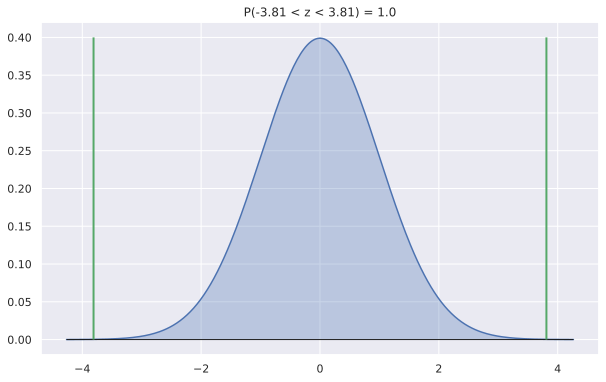

In [39]:
x, n, mu, sigma = 41, 3, 30, 5
z = abs((x - mu)/(sigma/3**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(1e-5), N_rv.ppf(1-1e-5), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

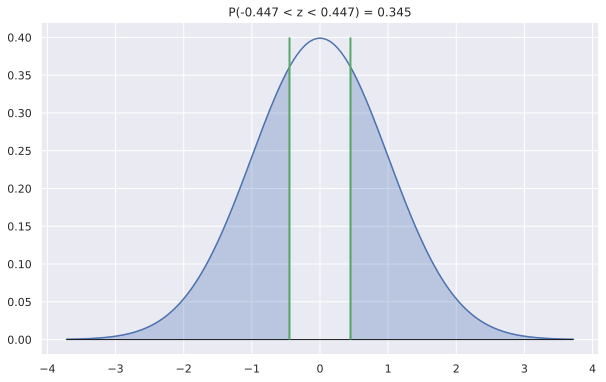

In [40]:
x, n, mu, sigma = 31, 5, 30, 5
z = abs((x - mu)/(sigma/n**0.5))
N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_le_z, x_ge_z = x[x<-z], x[x>z]
ax.fill_between(x_le_z, N_rv.pdf(x_le_z), np.zeros(len(x_le_z)), alpha=0.3, color='b')
ax.fill_between(x_ge_z, N_rv.pdf(x_ge_z), np.zeros(len(x_ge_z)), alpha=0.3, color='b')

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

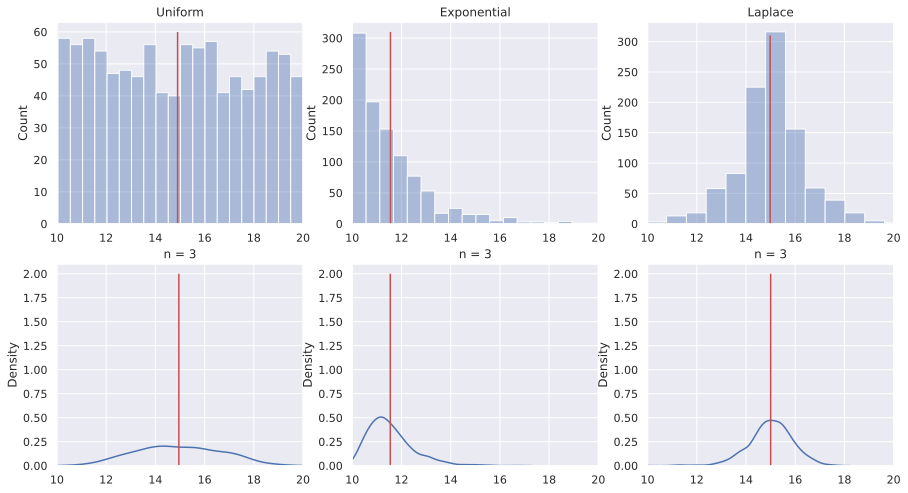

In [41]:
import matplotlib.animation as animation

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))

unif_rv = stats.uniform(loc=10, scale=10)
exp_rv = stats.expon(loc=10, scale=1.5)
lapl_rv = stats.laplace(loc=15)

np.random.seed(42)
unif_data = unif_rv.rvs(size=1000)
exp_data = exp_rv.rvs(size = 1000)
lapl_data = lapl_rv.rvs(size=1000)

title = ['Uniform', 'Exponential', 'Laplace']
data = [unif_data, exp_data, lapl_data]
y_max = [60, 310, 310]
n = [3, 10, 30, 50]

for i, ax in enumerate(axes[0]):
    sns.histplot(data[i], bins=20, alpha=0.4, ax=ax)
    ax.vlines(data[i].mean(), 0, y_max[i], color='r')
    ax.set_xlim(10, 20)
    ax.set_title(title[i])

def animate(i):
    for ax in axes[1]:
        ax.clear()
    for j in range(3):
        rand_idx = np.random.randint(0, 1000, size=(1000, n[i]))
        means = data[j][rand_idx].mean(axis=1)
        sns.kdeplot(means, ax=axes[1][j])
        axes[1][j].vlines(means.mean(), 0, 2, color='r')
        axes[1][j].set_xlim(10, 20)
        axes[1][j].set_ylim(0, 2.1)
        axes[1][j].set_title('n = ' + str(n[i]))
    fig.set_figwidth(15)
    fig.set_figheight(8)
    return axes[1][0], axes[1][1],axes[1][2]

dist_animation = animation.FuncAnimation(fig,
                                      animate,
                                      frames=np.arange(4),
                                      interval = 200,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
dist_animation.save('dist_means.gif',
                 writer='imagemagick',
                 fps=1)